In [12]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
#import graphviz

%matplotlib inline
import matplotlib.pyplot as plt
from os import listdir


# Importing test data from .csv

## Put the "Processed Files" in to the same folder as this file

In [114]:
directory_root = os.path.join(os.getcwd(), "Processed Files/Borussia Dortmund_FC Bayern Munchen_2020-05-26/Manuel_Borussia Dortmund_FC Bayern Munchen_2020-05-26.csv")

df = pd.read_csv(directory_root)

home_team = "FC Bayern Munchen"

df['Possession'] = np.where(df['Team'] == df['Possession-Team'], True, False)
#drop irrelevant columns
#print(df.shape)                       

df['Home_team'] = np.where(df['Team'] == home_team, True, False)
#drop irrelevant columns
#print(df.shape)

#print(temp.head())
df['First_half'] = np.where(df['Frame'] <= 27000, True, False)
#drop irrelevant columns

df['XPos'] = np.where(((df['Home_team']==True) & (df['First_half']==False)), -df['XPos'], df['XPos'])
df['YPos'] = np.where(((df['Home_team']==True) & (df['First_half']==False)), -df['YPos'], df['YPos'])    

df['XPos'] = np.where(((df['Home_team']==False) & (df['First_half']==True)), -df['XPos'], df['XPos'])
df['YPos'] = np.where(((df['Home_team']==False) & (df['First_half']==True)), -df['YPos'], df['YPos'])


df = df[["Position","XPos","YPos","Possession","First_half","Home_team"]]


df.head()



,Position,XPos,YPos,Possession,First_half,Home_team
0,GK,4.861071,-7.937677,True,True,True
1,GK,4.868517,-7.958456,True,True,True
2,GK,4.873197,-7.974019,True,True,True
3,GK,4.875108,-7.984367,True,True,True
4,GK,4.872818,-7.986959,True,True,True


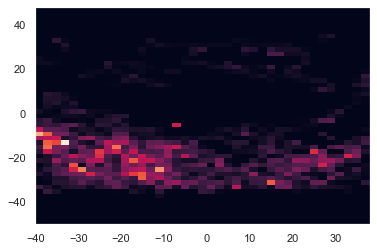

In [101]:
x = df[df['Position']=='RW']['XPos']
y = df[df['Position']=='RW']['YPos']


plt.hist2d(x,y, bins=[np.arange(-40,40,2),np.arange(-50,50,2)])

plt.show()

# Importing all data from .csv

## adding possesion data var
## adding home team var
## adding first_half var

## normalising data with above var

In [21]:
import os

dfData = pd.DataFrame(columns = ["Position","XPos","YPos","Possession","First_half","Home_team"])

os.path.join(os.getcwd(), "Processed Files")


directory = "C:/Users/Alvin/Desktop/NTU Sports Data Hackathon 2021 - Package/Processed Files/Borussia Dortmund_FC Bayern Munchen_2020-05-26"
directory_root = "C:/Users/Alvin/Desktop/NTU Sports Data Hackathon 2021 - Package/Processed Files"
directory_root = os.path.join(os.getcwd(), "Processed Files")

for filename1 in os.listdir(directory_root):
    if !filename1.endswith(".txt"):
        file_dir=os.path.join(directory_root, filename1)
        
        home_team = filename1[0:filename1.find("_")]
        print(home_team)
        
        for filename in os.listdir(file_dir):
            if filename.endswith(".csv"): 
                
                #print(os.path.join(directory, filename))
                df = pd.read_csv(os.path.join(file_dir, filename))
                #print(temp.head())
                
                df['Possession'] = np.where(df['Team'] == df['Possession-Team'], True, False)
                #drop irrelevant columns
                #print(df.shape)                       
                
                df['Home_team'] = np.where(df['Team'] == home_team, True, False)
                #drop irrelevant columns
                #print(df.shape)
                
                #print(temp.head())
                df['First_half'] = np.where(df['Frame'] <= 27000, True, False)
                #drop irrelevant columns
                
                df['XPos'] = np.where(((df['Home_team']==True) & (df['First_half']==False)), -df['XPos'], df['XPos'])
                df['YPos'] = np.where(((df['Home_team']==True) & (df['First_half']==False)), -df['YPos'], df['YPos'])    
            
                df['XPos'] = np.where(((df['Home_team']==False) & (df['First_half']==True)), -df['XPos'], df['XPos'])
                df['YPos'] = np.where(((df['Home_team']==False) & (df['First_half']==True)), -df['YPos'], df['YPos'])
                
                
                df = df[["Position","XPos","YPos","Possession","First_half","Home_team"]]
                #print(df.shape)                  
                
                
                
                
                dfData = dfData.append(df)


                #print(dfData.shape)        
                continue
            else:
                continue
    else:
        continue
#dfData.shape

Borussia Dortmund
Brighton and Hove Albion
Chelsea
FC Barcelona
FC Bayern Munchen
Inter Milan
Juventus
Liverpool Football Club
Manchester City
Manchester City
Manchester City
Manchester City
Manchester City
Manchester City
Manchester City
Manchester United
Paris Saint-Germain
Real Madrid CF
Southampton
Watford


In [22]:
dfDataMaster = dfData

In [56]:
dfData= dfDataMaster

In [57]:
dfData.head()

,Position,XPos,YPos,Possession,First_half,Home_team
0,RW,-7.262744,-5.964540,False,True,True
1,RW,-7.237308,-5.971644,False,True,True
2,RW,-7.215015,-5.973797,False,True,True
3,RW,-7.195864,-5.971002,False,True,True
4,RW,-7.183016,-5.945075,False,True,True


In [25]:
#dfData = dfData.sample(frac=1).reset_index(drop=True)

#dfDataO = dfData[dfData['Possession'] == True]  #splitting into attack at def
#dfDataD = dfData[dfData['Possession'] == False] #splitting into attack at def

#dfData = dfData[dfData['First_half'] == True]
#dfData = dfData[dfData['Home_team'] == True]


dfData.head()


,Position,XPos,YPos,Possession,First_half,Home_team
0,RW,-7.262744,-5.964540,False,True,True
1,RW,-7.237308,-5.971644,False,True,True
2,RW,-7.215015,-5.973797,False,True,True
3,RW,-7.195864,-5.971002,False,True,True
4,RW,-7.183016,-5.945075,False,True,True


# Changing types to catagorical

In [58]:
dfData["Possession"] = dfData["Possession"].astype("category") # change to catagory
dfData["Position"] = dfData["Position"].astype("category")

dfData["First_half"] = dfData["First_half"].astype("category")
dfData["Home_team"] = dfData["Home_team"].astype("category")


In [59]:
dfData = dfData.sample(frac=1).reset_index(drop=True)

dfData = dfData[['Position','XPos','YPos',"Possession"]]

dfData.head()

,Position,XPos,YPos,Possession
0,CF,-7.864743,-4.474913,True
1,CM,-12.067217,-18.646008,True
2,LW,27.081547,-9.176970,False
3,RCB,-24.990000,9.710000,True
4,RM,-2.284837,10.814429,True


In [60]:
dfData.shape

(9783717, 4)

# Reducing data size to 1,000,000 from 9,000,000 approx

In [61]:
dfData=dfData[:1000000]

# Stripping predictors to x, y & possesion

In [62]:
y = pd.DataFrame(dfData['Position']) #Response
X = pd.DataFrame(dfData[['XPos','YPos','Possession']]) #Predictor


#X = pd.DataFrame(dfData[['XPos','YPos','Possession','First_half','Home_team']]) #Predictor

#yO = pd.DataFrame(dfDataO['Position']) #Response
#XO = pd.DataFrame(dfDataO[['XPos','YPos']]) #Predictor

#yD = pd.DataFrame(dfDataD['Position']) #Response
#XD = pd.DataFrame(dfDataD[['XPos','YPos']]) #Predictor

In [63]:
X.head()

,XPos,YPos,Possession
0,-7.864743,-4.474913,True
1,-12.067217,-18.646008,True
2,27.081547,-9.176970,False
3,-24.990000,9.710000,True
4,-2.284837,10.814429,True


# Splitting to train & test set

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

#X_trainO, X_testO, y_trainO, y_testO = train_test_split(XO, yO, test_size = 0.2)

# Check the sample sizes
#print("Train Set :", y_trainO.shape, X_trainO.shape)
#print("Test Set  :", y_testO.shape, X_testO.shape)

#X_trainD, X_testD, y_trainD, y_testD = train_test_split(XD, yD, test_size = 0.2)

# Check the sample sizes
#print("Train Set :", y_trainD.shape, X_trainD.shape)
#print("Test Set  :", y_testD.shape, X_testD.shape)



Train Set : (800000, 1) (800000, 3)
Test Set  : (200000, 1) (200000, 3)


In [65]:
#Checking how many categories there are

pd.value_counts(y_train.Position, normalize = True)

RM     0.115524
LM     0.109941
LW     0.097300
RW     0.091942
CF     0.086133
LCB    0.085219
RWB    0.082610
RCB    0.080109
LWB    0.079356
CM     0.068245
GK     0.029648
RF     0.020406
LF     0.019793
AM     0.011570
CB     0.010541
DM     0.009205
SUB    0.002459
Name: Position, dtype: float64

In [66]:
pd.value_counts(y_train.Position, normalize = False)

RM     92419
LM     87953
LW     77840
RW     73554
CF     68906
LCB    68175
RWB    66088
RCB    64087
LWB    63485
CM     54596
GK     23718
RF     16325
LF     15834
AM      9256
CB      8433
DM      7364
SUB     1967
Name: Position, dtype: int64

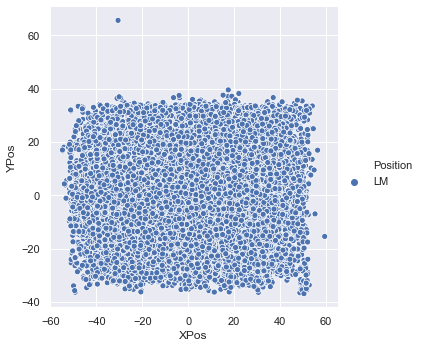

In [67]:
g = sb.relplot(x = 'XPos',
             y = 'YPos',
             hue = 'Position',
             kind = 'scatter',
             style = 'Position',
             #data = df[(df['Position']=='LM')| (df['Position']=='LW') | (df['Position']=='RM') | (df['Position']=='RF')])
             data = dfData[dfData['Position']=='LM'])

# Plotting heatmap of centerback position

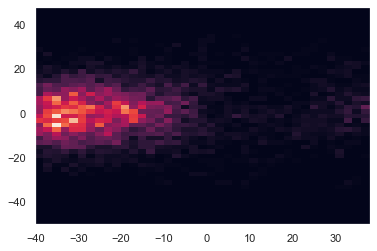

In [128]:
x = dfData[dfData['Position']=='CB']['XPos']
y = dfData[dfData['Position']=='CB']['YPos']


plt.hist2d(x,y, bins=[np.arange(-40,40,2),np.arange(-50,50,2)])

plt.show()

# Plotting heatmap of all position

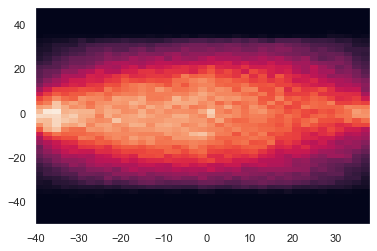

In [124]:
x = dfData['XPos']
y = dfData['YPos']


plt.hist2d(x,y, bins=[np.arange(-40,40,2),np.arange(-50,50,2)])

plt.show()

In [70]:
dfData.dtypes

Position      category
XPos           float64
YPos           float64
Possession    category
dtype: object

In [71]:
#dfData["Possession"] = dfData["Possession"].astype("category")
#dfData["Position"] = dfData["Position"].astype("category")

#dfData["First_half"] = dfData["First_half"].astype("category")
#dfData["Home_team"] = dfData["Home_team"].astype("category")





In [72]:
#dfData["Position"] = dfData["Position"].astype("category")

In [73]:
dfData.shape

(1000000, 4)

# Random forest model

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.97609875

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.1625



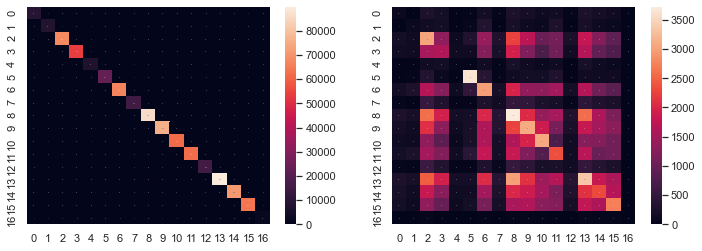

In [85]:
from sklearn.ensemble import RandomForestClassifier

# Decision Tree using Train Data
dectree = RandomForestClassifier(n_estimators=10)   # create the decision tree object
dectree.fit(X_train, y_train.values.ravel())       # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 1}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 1}, ax = axes[1])



In [116]:
dftest = df[["XPos","YPos","Possession"]]
dfans = df[["Position"]]

testpred = dectree.predict(dftest)

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(dftest, dfans))
print()

# Multi-variate Classifcation Tree

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.21645625

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.20775



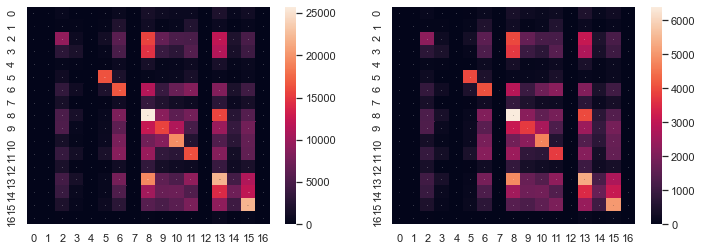

In [125]:
from sklearn.tree import DecisionTreeClassifier


# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 11)   # create the decision tree object
dectree.fit(X_train, y_train.values.ravel())       # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 1}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 1}, ax = axes[1])

